# Explore

## Import Libraries and Setup

We will set the set specification for figure plotting.

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re

from acquire import get_blog_df, get_articles

#Disable Warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

Now we will create a function for cleaning text. 

In [3]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

## Acquire 

In [4]:
#acquire data from spam_db

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


We will change the options, so that we can view the maximum column width, since our strings are relatively long.

In [5]:
pd.set_option('display.max_colwidth', -1)

In [6]:
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [7]:
# how many spam and ham observations do we have?

df.label.value_counts(normalize = True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 130.6+ KB


In [9]:
# combine all messages in single string by label

ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))
#all_words now contains all messages

## Exploration

We will determine the most frequently used words in our dataset.

In [10]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [11]:
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis = 1).fillna(0).astype(int)
word_counts.head()

,0,1,2
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


In [12]:
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


Most frequently occuring words in 'all'.

In [13]:
word_counts.sort_values('all', ascending=False).head(20)

,ham,spam,all
i,2305,45,2350
to,1554,686,2240
you,1837,287,2124
a,1055,376,1431
the,1118,204,1322
u,986,147,1133
and,848,122,970
is,728,158,886
in,811,73,884
me,756,30,786


Most frequently occuring words in 'ham'.

In [14]:
word_counts.sort_values('ham', ascending=False).head(20)

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431
u,986,147,1133
and,848,122,970
in,811,73,884
me,756,30,786
my,743,10,753


Most frequently occuring words in 'spam'.

In [15]:
word_counts.sort_values('spam', ascending=False).head(20)

,ham,spam,all
to,1554,686,2240
a,1055,376,1431
call,229,347,576
you,1837,287,2124
your,414,263,677
free,59,216,275
the,1118,204,1322
for,501,203,704
now,289,189,478
or,228,188,416


Words used in ham, but not in spam.

In [16]:
word_counts.sort_values(['ham', 'spam'], ascending=[False, True]).head(20)

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431
u,986,147,1133
and,848,122,970
in,811,73,884
me,756,30,786
my,743,10,753


Words used in spam, but not in ham.

In [17]:
word_counts.sort_values(['ham', 'spam'], ascending=[True, False]).head(20)

,ham,spam,all
claim,0,113,113
prize,0,92,92
won,0,73,73
guaranteed,0,50,50
tone,0,48,48
18,0,43,43
awarded,0,38,38
a1000,0,35,35
150ppm,0,34,34
a2000,0,31,31


## Bigrams

We will explore the most frequently used bigrams in the spam data.

In [18]:
spam_words_clean = clean(spam_words)

In [19]:
top_20_spam_bigrams = (pd.Series(nltk.bigrams(spam_words_clean.split()))
                      .value_counts()
                      .head(20))

top_20_spam_bigrams.head()

(you, have)       73
(have, won)       54
(your, mobile)    49
(to, claim)       46
(please, call)    44
dtype: int64

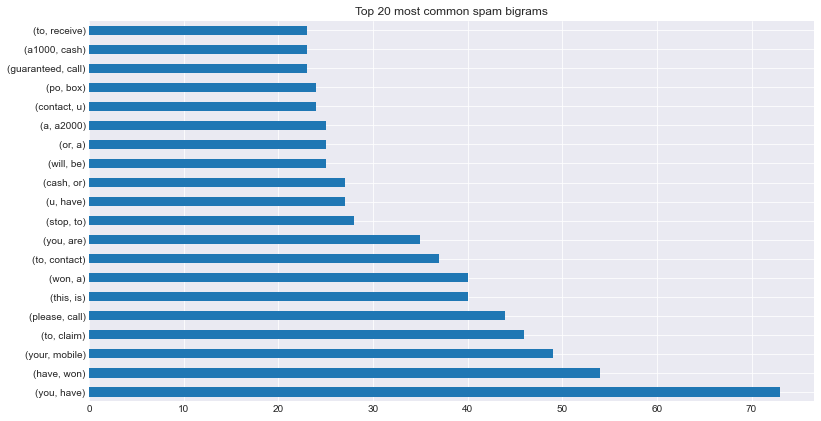

In [20]:
top_20_spam_bigrams.plot.barh()
title = plt.title('Top 20 most common spam bigrams')

In [21]:
ham_words_clean = clean(ham_words)

In [22]:
top_20_ham_bigrams = (pd.Series(nltk.bigrams(ham_words_clean.split()))
                      .value_counts()
                      .head(20))

top_20_ham_bigrams.head()

(are, you)    173
(i, am)       132
(have, a)     110
(i, will)     98 
(do, you)     91 
dtype: int64

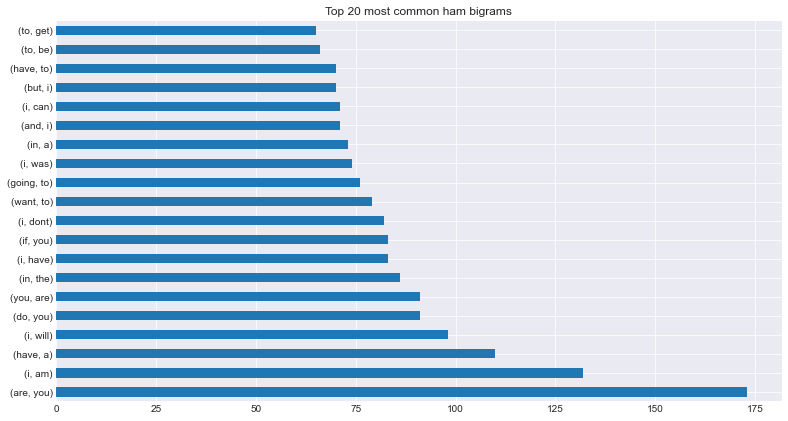

In [23]:
top_20_ham_bigrams.plot.barh()
title = plt.title('Top 20 most common ham bigrams')

### Word Cloud

We will visualize the most frequent values for spam and ham data using a word cloud.

In [24]:
from wordcloud import WordCloud

**Spam Word Cloud**

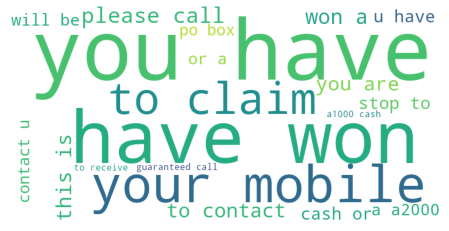

In [25]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

**Ham Word Cloud**

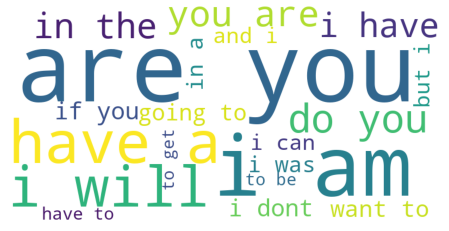

In [26]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

### Is there any overlap in the bigrams for the spam data and the ham data?

In [27]:
top_100_spam_bigrams = (pd.Series(nltk.bigrams(spam_words_clean.split()))
                      .value_counts()
                      .head(100))

top_100_spam_bigrams.head()

(you, have)       73
(have, won)       54
(your, mobile)    49
(to, claim)       46
(please, call)    44
dtype: int64

In [28]:
top_100_spam_bigrams_df = pd.DataFrame(top_100_spam_bigrams)

In [29]:
top_100_spam_bigrams_df = top_100_spam_bigrams_df.reset_index()

In [30]:
top_100_spam_bigrams_df.columns = ['bigram', 'count']

In [31]:
top_100_spam_bigrams_df.tail()

,bigram,count
95,"(claim, call)",13
96,"(call, from)",13
97,"(for, a)",13
98,"(your, 2003)",13
99,"(free, call)",13


In [32]:
top_100_ham_bigrams = (pd.Series(nltk.bigrams(ham_words_clean.split()))
                      .value_counts()
                      .head(100))

top_100_ham_bigrams.head()

(are, you)    173
(i, am)       132
(have, a)     110
(i, will)     98 
(do, you)     91 
dtype: int64

In [33]:
top_100_ham_bigrams_df = pd.DataFrame(top_100_ham_bigrams)

In [34]:
top_100_ham_bigrams_df = top_100_ham_bigrams_df.reset_index()

In [35]:
top_100_ham_bigrams_df.columns = ['bigram', 'count']

In [36]:
top_100_ham_bigrams_df['bigram'].isin(top_100_spam_bigrams_df['bigram']).value_counts()

False    89
True     11
Name: bigram, dtype: int64

In [37]:
top_100_ham_bigrams_df[top_100_ham_bigrams_df['bigram'].isin(top_100_spam_bigrams_df['bigram'])]

,bigram,count
2,"(have, a)",110
4,"(do, you)",91
5,"(you, are)",91
18,"(to, be)",66
23,"(will, be)",58
42,"(you, have)",45
54,"(is, the)",41
57,"(go, to)",39
64,"(to, the)",38
72,"(for, a)",36


The above values overlap in both the top 100 spam and ham bigrams.

## Trigrams

In [38]:
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words_clean.split(), 3))
                      .value_counts()
                      .head(20))

top_20_spam_trigrams.head()

(you, have, won)             37
(have, won, a)               33
(prize, guaranteed, call)    21
(a1000, cash, or)            19
(to, contact, u)             18
dtype: int64

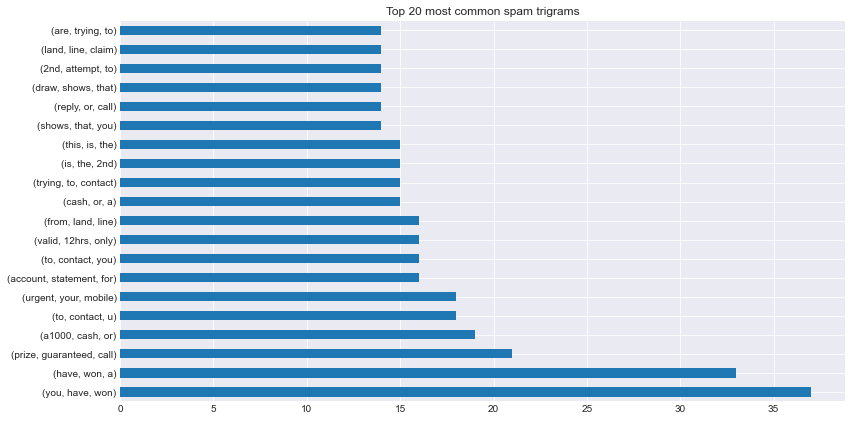

In [39]:
top_20_spam_trigrams.plot.barh()
title = plt.title('Top 20 most common spam trigrams')

In [40]:
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words_clean.split(), 3))
                      .value_counts()
                      .head(20))

top_20_ham_trigrams.head()

(ill, call, later)    39
(sorry, ill, call)    38
(how, are, you)       35
(i, want, to)         29
(let, me, know)       26
dtype: int64

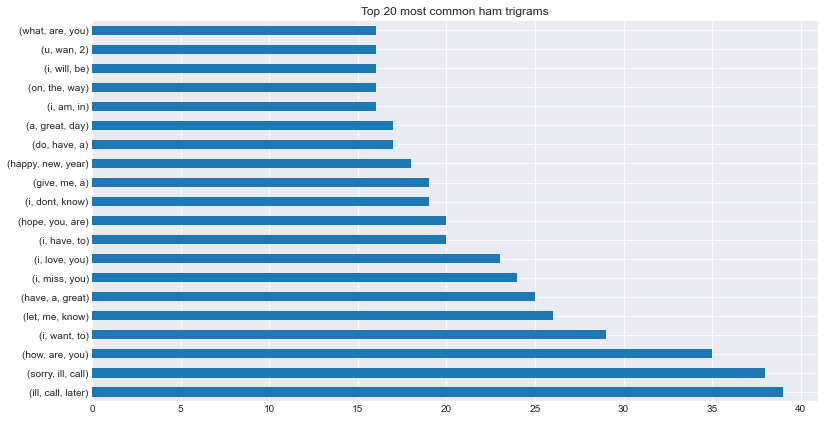

In [41]:
top_20_ham_trigrams.plot.barh()
title = plt.title('Top 20 most common ham trigrams')

**Spam Trigram Word Cloud**

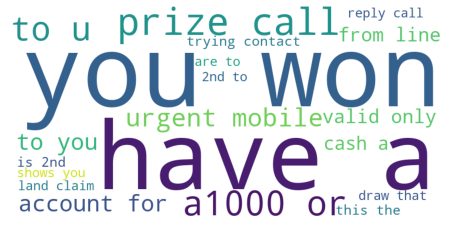

In [43]:
data = {k[0] + ' ' + k[2]: v for k, v in top_20_spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

**Ham Trigram Word Cloud**

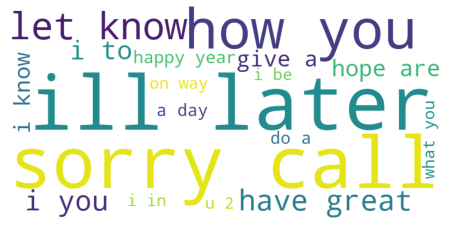

In [44]:
data = {k[0] + ' ' + k[2]: v for k, v in top_20_ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

## Blog Articles 

In [63]:
blog_df = get_blog_df()

In [64]:
blog_df.head()

title  \
0  Codeup’s Data Science Career Accelerator is Here!           
1  Data Science Myths                                          
2  Data Science VS Data Analytics: What’s The Difference?      
3  10 Tips to Crush It at the SA Tech Job Fair                 
4  Competitor Bootcamps Are Closing. Is the Model in Danger?   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

We will perform sentiment analysis on these articles.

In [47]:
import nltk.sentiment

sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [56]:
for i in range(len(blog_df)):
    print("Sentiment Analysis for Blog Post:", blog_df.title[i])
    print(sia.polarity_scores(blog_df.contents[i]))
    print(" ")

Sentiment Analysis for Blog Post: Codeup’s Data Science Career Accelerator is Here!
{'neg': 0.007, 'neu': 0.897, 'pos': 0.096, 'compound': 0.9844}
 
Sentiment Analysis for Blog Post: Data Science Myths
{'neg': 0.023, 'neu': 0.889, 'pos': 0.089, 'compound': 0.9916}
 
Sentiment Analysis for Blog Post: Data Science VS Data Analytics: What’s The Difference?
{'neg': 0.0, 'neu': 0.957, 'pos': 0.043, 'compound': 0.9561}
 
Sentiment Analysis for Blog Post: 10 Tips to Crush It at the SA Tech Job Fair
{'neg': 0.027, 'neu': 0.824, 'pos': 0.149, 'compound': 0.9978}
 
Sentiment Analysis for Blog Post: Competitor Bootcamps Are Closing. Is the Model in Danger?
{'neg': 0.069, 'neu': 0.85, 'pos': 0.081, 'compound': 0.4798}
 


In [66]:
contents_clean = []
for i in range(len(blog_df)):
    contents_clean.append(clean(blog_df['contents'][i]))

In [69]:
for i in range(len(contents_clean)):
    print("Sentiment Analysis for Blog Post:", blog_df.title[i])
    print(sia.polarity_scores(contents_clean[i]))
    print(" ")

Sentiment Analysis for Blog Post: Codeup’s Data Science Career Accelerator is Here!
{'neg': 0.007, 'neu': 0.904, 'pos': 0.089, 'compound': 0.979}
 
Sentiment Analysis for Blog Post: Data Science Myths
{'neg': 0.023, 'neu': 0.887, 'pos': 0.09, 'compound': 0.9912}
 
Sentiment Analysis for Blog Post: Data Science VS Data Analytics: What’s The Difference?
{'neg': 0.0, 'neu': 0.96, 'pos': 0.04, 'compound': 0.9413}
 
Sentiment Analysis for Blog Post: 10 Tips to Crush It at the SA Tech Job Fair
{'neg': 0.018, 'neu': 0.829, 'pos': 0.153, 'compound': 0.9981}
 
Sentiment Analysis for Blog Post: Competitor Bootcamps Are Closing. Is the Model in Danger?
{'neg': 0.069, 'neu': 0.852, 'pos': 0.079, 'compound': 0.3151}
 


The overall tone for all of our blog posts is neutral. Amongt these:
 - The most negative is *Competitor Bootcams Are Closing. Is the Model in Danger?* article. 
 - The most positive is *10 Tips to Crush It at the SA Tech Job Fair* article.
 - The most netural is *Data Science VS Data Analytics: What’s The Difference?*

**Bigrams**

In [ ]:
all_articles = ' '.join(contents_clean)

In [85]:
top_20_blog_bigrams = (pd.Series(nltk.ngrams(all_articles.split(), 2))
                      .value_counts()
                      .head(20))

top_20_blog_bigrams.head()

(data, science)        26
(machine, learning)    14
(in, the)              12
(data, scientist)      8 
(job, fair)            7 
dtype: int64

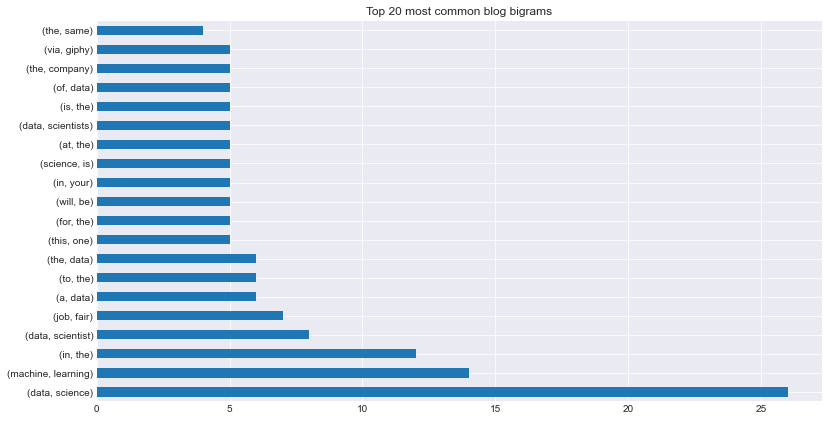

In [86]:
top_20_blog_bigrams.plot.barh()
title = plt.title('Top 20 most common blog bigrams')

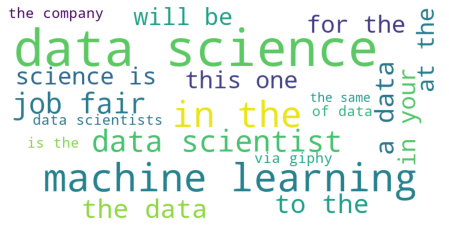

In [87]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_blog_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

**Trigrams**

In [81]:
top_20_blog_trigrams = (pd.Series(nltk.ngrams(all_articles.split(), 3))
                      .value_counts()
                      .head(20))

top_20_blog_trigrams.head()

(data, science, is)     5
(tech, job, fair)       4
(a, data, scientist)    4
(busted, via, giphy)    4
(via, giphy, myth)      4
dtype: int64

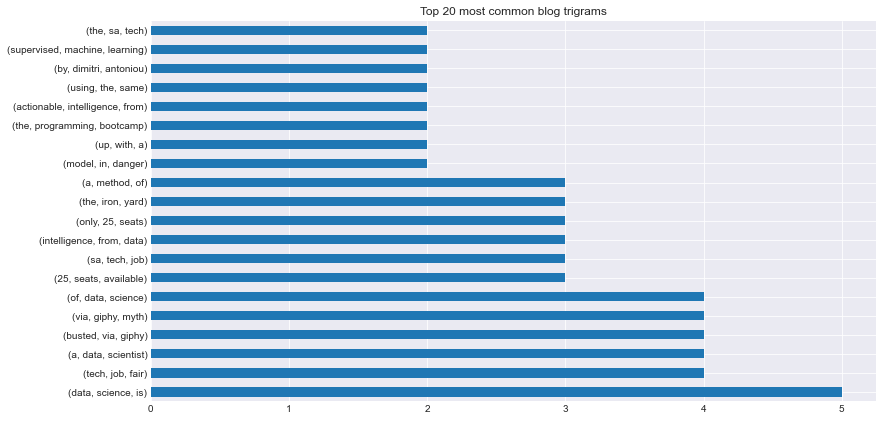

In [82]:
top_20_blog_trigrams.plot.barh()
title = plt.title('Top 20 most common blog trigrams')

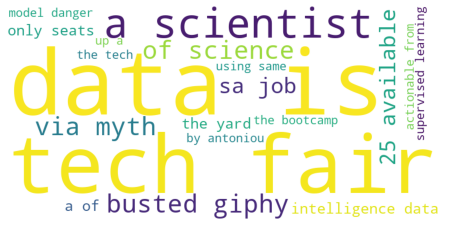

In [84]:
data = {k[0] + ' ' + k[2]: v for k, v in top_20_blog_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

## News Articles

In [88]:
categories = ["business",
"sports",
"technology",
"entertainment"]

In [90]:
news_df = get_articles(categories)

In [91]:
news_df

,title,contents,category
0,Facebook changes its company name to 'Meta',"Facebook on Thursday announced it's changing the company's name to 'Meta' to reflect its focus on 'metaverse'. Using augmented reality and virtual reality, Facebook plans to create a greater sense of ""virtual presence"" to mimic the experience of interacting in person. ""The names of the apps that we build—Facebook, Instagram, Messenger and WhatsApp—will remain the same,"" the company said.",business
1,"'Man who takes 6 months parental leave is a loser,' says Palantir Co-founder","Several Twitter users criticised US-based Palantir Technologies' Co-founder Joe Lonsdale after he said, ""Any man in an important position who takes six months of leave for a newborn is a loser."" Lonsdale was responding to a tweet about US Transportation Secretary Pete Buttigieg, who took leave for his child. ""Respect that people have different choices,"" Initialized Capital's Garry Tan wrote.",business
2,"Delhi HC notice to RBI, SBI over banning UPI payments in crypto exchanges","The Delhi High Court on Thursday issued notice to RBI, SBI, NPCI and others on a petition seeking the rollback of the decision of prohibiting UPI payments in the crypto exchanges. The plea alleged that SBI's decision of blocking UPI services for WazirX users violated a Supreme Court judgement. The matter is now slated for hearing on December 24.",business
3,"Indian market has 3 key beauties: Paytm CEO ahead of ₹18,300-crore IPO","Vijay Shekhar Sharma, the CEO of Paytm that plans to raise ₹18,300 crore in India's biggest IPO, told Moneycontrol, ""Indian market has three key beauties."" Sharma said, ""It has a large number of underserved customers...Second, there's a large customer base who are smartphone (users)."" He added, ""The third is a market where there's a new product to serve to customers.""",business
4,Paytm will not force employees to come to office: CEO,"Paytm will continue to allow employees to work from home and will not force them to come to the office, CEO Vijay Shekhar Sharma said on Thursday. He added, ""We will be 100% flexible forever for good."" In September, Sharma had tweeted, ""Future of work (for technology/ knowledge companies) will be a choice between hybrid and work from home.""",business
...,...,...,...
95,"Star system will never go, but OTT created new stars: Zareen Khan","Actress Zareen Khan in an interview has said that while the fascination with stars will never go, OTT content has created new stars overnight. She further said that in theatres, limited stars were seen and worshipped. ""Now people who maybe do not come from a Bollywood background but are very good with their talent should be called stars,"" Zareen added.",entertainment
96,'83' is Kabir Khan's labour of love for Indian team: Tahir,"Actor Tahir Raj Bhasin has said his upcoming film, '83', is director Kabir Khan's labour of love and passion for the Indian cricket team. ""It's a film about how underdog India went on to become world champions,"" he added. The film, based on India's win in the 1983 Cricket World Cup, will arrive in theatres on Christmas this year.",entertainment
97,"Chose to do stunts myself, no body doubles: Nitu on H'wood debut","Actress Nitu Chandra has revealed that she chose to do her own stunts without body doubles in her Hollywood debut film 'Never Back Down: Revolt'. ""Being a black belt 4th Dan in Taekwondo, I was confident about this role,"" she added. Nitu further said her role in the film was her shot at doing something new as an actor.",entertainment
98,"Witnessed exorcism as child, most frightening thing: Emraan Hashmi","Actor Emraan Hashmi has said that he witnessed an exorcism as a child and called it the most frightening thing at any age. He said his mother followed Christianity and took him to church for a sermon where an exorcism was happening. ""I didn't see but heard it, and I don't know if it was a man or...woman,"" Emraan added.",entertainment


In [92]:
news_clean = []
for i in range(len(news_df)):
    news_clean.append(clean(news_df['contents'][i]))

In [99]:
scores = []
for i in range(len(news_clean)):
    scores.append(sia.polarity_scores(news_clean[i]))

In [100]:
scores_df = pd.DataFrame(scores)

In [118]:
scores_df.head()

,neg,neu,pos,compound
0,0.000,0.924,0.076,0.5574
1,0.133,0.791,0.076,-0.4019
2,0.094,0.832,0.074,-0.3182
3,0.000,0.920,0.080,0.5719
4,0.000,0.891,0.109,0.6908


In [117]:
news_clean_df = pd.DataFrame(news_clean)

In [119]:
news_clean_df.head()

,0
0,facebook on thursday announced its changing the companys name to meta to reflect its focus on metaverse using augmented reality and virtual reality facebook plans to create a greater sense of virtual presence to mimic the experience of interacting in person the names of the apps that we buildfacebook instagram messenger and whatsappwill remain the same the company said
1,several twitter users criticised usbased palantir technologies cofounder joe lonsdale after he said any man in an important position who takes six months of leave for a newborn is a loser lonsdale was responding to a tweet about us transportation secretary pete buttigieg who took leave for his child respect that people have different choices initialized capitals garry tan wrote
2,the delhi high court on thursday issued notice to rbi sbi npci and others on a petition seeking the rollback of the decision of prohibiting upi payments in the crypto exchanges the plea alleged that sbis decision of blocking upi services for wazirx users violated a supreme court judgement the matter is now slated for hearing on december 24
3,vijay shekhar sharma the ceo of paytm that plans to raise 18300 crore in indias biggest ipo told moneycontrol indian market has three key beauties sharma said it has a large number of underserved customerssecond theres a large customer base who are smartphone users he added the third is a market where theres a new product to serve to customers
4,paytm will continue to allow employees to work from home and will not force them to come to the office ceo vijay shekhar sharma said on thursday he added we will be 100 flexible forever for good in september sharma had tweeted future of work for technology knowledge companies will be a choice between hybrid and work from home


In [122]:
news_clean_df.columns = ['contents_clean']

In [123]:
news_df_with_scores = pd.concat([news_df, news_clean_df, scores_df], axis=1) 

In [124]:
news_df_with_scores.head()

,title,contents,category,contents_clean,neg,neu,pos,compound
0,Facebook changes its company name to 'Meta',"Facebook on Thursday announced it's changing the company's name to 'Meta' to reflect its focus on 'metaverse'. Using augmented reality and virtual reality, Facebook plans to create a greater sense of ""virtual presence"" to mimic the experience of interacting in person. ""The names of the apps that we build—Facebook, Instagram, Messenger and WhatsApp—will remain the same,"" the company said.",business,facebook on thursday announced its changing the companys name to meta to reflect its focus on metaverse using augmented reality and virtual reality facebook plans to create a greater sense of virtual presence to mimic the experience of interacting in person the names of the apps that we buildfacebook instagram messenger and whatsappwill remain the same the company said,0.000,0.924,0.076,0.5574
1,"'Man who takes 6 months parental leave is a loser,' says Palantir Co-founder","Several Twitter users criticised US-based Palantir Technologies' Co-founder Joe Lonsdale after he said, ""Any man in an important position who takes six months of leave for a newborn is a loser."" Lonsdale was responding to a tweet about US Transportation Secretary Pete Buttigieg, who took leave for his child. ""Respect that people have different choices,"" Initialized Capital's Garry Tan wrote.",business,several twitter users criticised usbased palantir technologies cofounder joe lonsdale after he said any man in an important position who takes six months of leave for a newborn is a loser lonsdale was responding to a tweet about us transportation secretary pete buttigieg who took leave for his child respect that people have different choices initialized capitals garry tan wrote,0.133,0.791,0.076,-0.4019
2,"Delhi HC notice to RBI, SBI over banning UPI payments in crypto exchanges","The Delhi High Court on Thursday issued notice to RBI, SBI, NPCI and others on a petition seeking the rollback of the decision of prohibiting UPI payments in the crypto exchanges. The plea alleged that SBI's decision of blocking UPI services for WazirX users violated a Supreme Court judgement. The matter is now slated for hearing on December 24.",business,the delhi high court on thursday issued notice to rbi sbi npci and others on a petition seeking the rollback of the decision of prohibiting upi payments in the crypto exchanges the plea alleged that sbis decision of blocking upi services for wazirx users violated a supreme court judgement the matter is now slated for hearing on december 24,0.094,0.832,0.074,-0.3182
3,"Indian market has 3 key beauties: Paytm CEO ahead of ₹18,300-crore IPO","Vijay Shekhar Sharma, the CEO of Paytm that plans to raise ₹18,300 crore in India's biggest IPO, told Moneycontrol, ""Indian market has three key beauties."" Sharma said, ""It has a large number of underserved customers...Second, there's a large customer base who are smartphone (users)."" He added, ""The third is a market where there's a new product to serve to customers.""",business,vijay shekhar sharma the ceo of paytm that plans to raise 18300 crore in indias biggest ipo told moneycontrol indian market has three key beauties sharma said it has a large number of underserved customerssecond theres a large customer base who are smartphone users he added the third is a market where theres a new product to serve to customers,0.000,0.920,0.080,0.5719
4,Paytm will not force employees to come to office: CEO,"Paytm will continue to allow employees to work from home and will not force them to come to the office, CEO Vijay Shekhar Sharma said on Thursday. He added, ""We will be 100% flexible forever for good."" In September, Sharma had tweeted, ""Future of work (for technology/ knowledge companies) will be a choice between hybrid and work from home.""",business,paytm will continue to allow employees to work from home and will not force them to come to the office ceo vijay shekhar sharma said on thu

**The most negative news story**

In [126]:
news_df_with_scores[news_df_with_scores.neg == news_df_with_scores.neg.max()]

,title,contents,category,contents_clean,neg,neu,pos,compound
63,Facebook hires Britney's lawyer to fight upcoming TV show: Report,"Facebook has hired Mathew Rosengart, the lawyer who fought against Britney Spears' conservatorship, to fight upcoming TV series 'Doomsday Machine', Deadline reported. The series is an adaption of An Ugly Truth, a book on Facebook's steps on issues like misinformation, hate speech and user security. Facebook has threatened legal action if any false statements about it appear in the show.",technology,facebook has hired mathew rosengart the lawyer who fought against britney spears conservatorship to fight upcoming tv series doomsday machine deadline reported the series is an adaption of an ugly truth a book on facebooks steps on issues like misinformation hate speech and user security facebook has threatened legal action if any false statements about it appear in the show,0.27,0.618,0.112,-0.9231


**The most postive news story**

In [127]:
news_df_with_scores[news_df_with_scores.pos == news_df_with_scores.pos.max()]

,title,contents,category,contents_clean,neg,neu,pos,compound
49,Noida DM Suhas LY recommended for Arjuna Award,"Gautam Buddha Nagar District Magistrate Suhas Lalinakere Yathiraj has been recommended for the Arjuna Award by the selection committee of the National Sports Awards. He won a silver medal in the final of the men's singles SL4 category at the Tokyo Paralympics held in September. ""I thank all the citizens for giving me so much love and affection,"" he said.",sports,gautam buddha nagar district magistrate suhas lalinakere yathiraj has been recommended for the arjuna award by the selection committee of the national sports awards he won a silver medal in the final of the mens singles sl4 category at the tokyo paralympics held in september i thank all the citizens for giving me so much love and affection he said,0.0,0.637,0.363,0.9796


**The most netural news stories**

In [128]:
news_df_with_scores[news_df_with_scores.neu == news_df_with_scores.neu.max()]

,title,contents,category,contents_clean,neg,neu,pos,compound
12,Who are India's top philanthropists according to Hurun's latest list?,"Wipro's Founder Chairman Azim Premji and family have topped the EdelGive Hurun India Philanthropy List 2021 by donating ₹9,713 crore from April 1, 2020, to March 31, 2021, at an average of ₹27 crore per day. They're followed by HCL Tech's Shiv Nadar and family, Mukesh Ambani and family and Kumar Mangalam Birla and family. Infosys' Nandan Nilekani ranks fifth.",business,wipros founder chairman azim premji and family have topped the edelgive hurun india philanthropy list 2021 by donating 9713 crore from april 1 2020 to march 31 2021 at an average of 27 crore per day theyre followed by hcl techs shiv nadar and family mukesh ambani and family and kumar mangalam birla and family infosys nandan nilekani ranks fifth,0.0,1.0,0.0,0.0
26,Who are the five oldest players featuring in T20 World Cup 2021?,"West Indies' Chris Gayle, aged over 42, is the oldest cricketer featuring in the ongoing T20 World Cup 2021. Gayle is followed by Pakistan all-rounders, 41-year-old Mohammad Hafeez and 39-year-old Shoaib Malik. West Indies' Dwayne Bravo is the fourth-oldest player in the tournament at the age of 38. He is followed by Namibia's Craig Williams, who's 37 years old.",sports,west indies chris gayle aged over 42 is the oldest cricketer featuring in the ongoing t20 world cup 2021 gayle is followed by pakistan allrounders 41yearold mohammad hafeez and 39yearold shoaib malik west indies dwayne bravo is the fourtholdest player in the tournament at the age of 38 he is followed by namibias craig williams whos 37 years old,0.0,1.0,0.0,0.0
52,Google CEO Sundar Pichai forgets to unmute himself on video call; shares video,"Google CEO Sundar Pichai posted a video on Twitter showing him forgetting to unmute himself on a video call. Pichai was talking to Muppet character Kermit the Frog when he said, ""Can't believe I'm talking to Google's CEO and he's on mute."" Pichai unmuted himself and said, ""I was on mute...I've done it a few times this year...like everyone else.""",technology,google ceo sundar pichai posted a video on twitter showing him forgetting to unmute himself on a video call pichai was talking to muppet character kermit the frog when he said cant believe im talking to googles ceo and hes on mute pichai unmuted himself and said i was on muteive done it a few times this yearlike everyone else,0.0,1.0,0.0,0.0
66,Musk's team didn't know he was moving Tesla HQ from California: Govt,"Director of California Governor Gavin Newsom's Office of Business and Economic Development Dee Dee Myers has said Tesla CEO Elon Musk had not told his team about moving Tesla's headquarters from California to Texas. She added California government officials were also not informed about the plans. ""I don't think anybody knows...what it means that he's moving his headquarters,"" Myers said.",technology,director of california governor gavin newsoms office of business and economic development dee dee myers has said tesla ceo elon musk had not told his team about moving teslas headquarters from california to texas she added california government officials were also not informed about the plans i dont think anybody knowswhat it means that hes moving his headquarters myers said,0.0,1.0,0.0,0.0
99,Don't think rumours on my life take away focus from work: Shraddha,"Actress Shraddha Kapoor in an interview has said that she doesn't think that all the rumours about her personal life take away the focus from her work. ""I have never really spoken much about my personal life anyway,"" she added. The actress further said that she is shooting for an untitled Luv Ranjan directorial with Ranbir Kapoor and Dimple Kapadia.",entertainment,actress shraddha kapoor in an interview has said that she doesnt think that all the rumours about her personal life take away the focus from her work i have never really spoken much about my personal life anyway she added 

**Compound Sentiment Score by Category**

In [129]:
news_df_with_scores.groupby('category').compound.mean()

category
business         0.097008
entertainment    0.395576
sports           0.222460
technology       0.140052
Name: compound, dtype: float64

In [130]:
news_df_with_scores.groupby('category').compound.median()

category
business         0.1027
entertainment    0.7436
sports           0.4019
technology       0.2500
Name: compound, dtype: float64

Entertainment has the highest overall sentiment score, business has the lowest.

In [131]:
news_df_with_scores.groupby('category').neu.mean()

category
business         0.88644
entertainment    0.83128
sports           0.83424
technology       0.87744
Name: neu, dtype: float64

In [132]:
news_df_with_scores.groupby('category').neu.median()

category
business         0.891
entertainment    0.822
sports           0.847
technology       0.887
Name: neu, dtype: float64

Business is the most neutral, entertainment it the least neutral. 